In [1]:
import pandas as pd
import seaborn as sns
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import glob
from os import listdir
from os.path import isfile, join
from PIL import Image
import bpy
import random
import cv2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3
from tensorflow.keras.models import load_model, Model
from skimage import color
import keras

In [2]:
datagen_ = ImageDataGenerator(preprocessing_function=preprocess_input,
                                 zoom_range=(0.8, 1.2)) 
# We set shuffle to False so we can compare predicted labels to true labels
train_generator = datagen_.flow_from_directory('C:/Users/izine/Desktop/GitHub/Springboard-Data-Science/Capstone 3/birds/train',
                                                      batch_size=64,
                                                      target_size=(224,224),
                                                      shuffle = False,
                                                      class_mode='categorical')
test_generator = datagen_.flow_from_directory('C:/Users/izine/Desktop/GitHub/Springboard-Data-Science/Capstone 3/birds/test',
                                                           batch_size=64,
                                                           target_size=(224,224),
                                                           shuffle = False,
                                                           class_mode='categorical')
#
valid_generator = datagen_.flow_from_directory('C:/Users/izine/Desktop/GitHub/Springboard-Data-Science/Capstone 3/birds/valid',
                                                           batch_size=64,
                                                           target_size=(224,224),
                                                           shuffle = False,
                                                           class_mode='categorical')

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [3]:
model_EF = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')
model_EF.trainable = False


model = Sequential([model_EF, Flatten(), 
                       Dropout(rate=0.2), layers.BatchNormalization(), 
                       Dense(315, activation='softmax')])

model.compile(optimizer=Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics="accuracy")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 315)               403515    
                                                                 
Total params: 4,458,206
Trainable params: 406,075
Non-trainable params: 4,052,131
________________________________________

In [34]:
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

model_hist = model.fit(train_generator,
                            epochs=25,
                            validation_data=valid_generator,
                            callbacks=callback)

Epoch 1/25
719/719 [==============================] - 366s 504ms/step - loss: 1.7302 - accuracy: 0.6232 - val_loss: 0.4350 - val_accuracy: 0.8832 - lr: 1.0000e-04
Epoch 2/25
719/719 [==============================] - 346s 482ms/step - loss: 0.2438 - accuracy: 0.9340 - val_loss: 0.3590 - val_accuracy: 0.8959 - lr: 1.0000e-04
Epoch 3/25
719/719 [==============================] - 343s 477ms/step - loss: 0.1256 - accuracy: 0.9660 - val_loss: 0.3304 - val_accuracy: 0.9105 - lr: 1.0000e-04
Epoch 4/25
719/719 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9745
Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
719/719 [==============================] - 346s 482ms/step - loss: 0.0944 - accuracy: 0.9745 - val_loss: 0.3380 - val_accuracy: 0.9098 - lr: 1.0000e-04
Epoch 5/25
719/719 [==============================] - 353s 491ms/step - loss: 0.0543 - accuracy: 0.9853 - val_loss: 0.2872 - val_accuracy: 0.9244 - lr: 5.0000e-05
Epoch 6/25
719/719 [

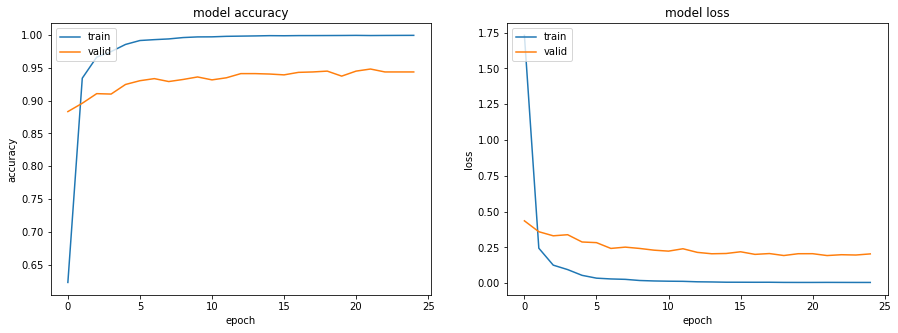

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(model_hist.history['accuracy'])
ax[0].plot(model_hist.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'valid'], loc='upper left')


ax[1].plot(model_hist.history['loss'])
ax[1].plot(model_hist.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'valid'], loc='upper left')
plt.show()

In [56]:
model.save('efficientnet0_model')

INFO:tensorflow:Assets written to: efficientnet0_model\assets


C:\Users\izine\AppData\Roaming\Python\Python38\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\izine\AppData\Roaming\Python\Python38\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [58]:
model =  keras.models.load_model('efficientnet0_model')

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_7 (Dropout)         (None, 62720)             0         
                                                                 
 batch_normalization_7 (Batc  (None, 62720)            250880    
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 315)               19757115  
                                                                 
Total params: 24,057,566
Trainable params: 19,882,555
Non-trainable params: 4,175,011
__________________________________

#### Let's unfreeze some layers to see if it improves performance

In [7]:
model_EF = model.layers[0]

In [20]:
model_EF.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_7 (Normalization  (None, 224, 224, 3)  7          ['rescaling_7[0][0]']            
 )                                                                                                
                                                                                     

In [24]:
model_EF.trainable = False

for l in model_EF.layers:
    print(l.name, l.trainable)

input_8 False
rescaling_7 False
normalization_7 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False

In [15]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

 

 
    unfreeze_model(model)

In [22]:
unfreeze_model(model_EF)

In [ ]:
# callback = [EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True),
#             ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

# model.compile(optimizer=Adam(1e-4),
#                   loss='categorical_crossentropy',
#                   metrics="accuracy")

# model_hist = model.fit(train_generator,
#                             epochs=10,
#                             validation_data=valid_generator,
#                             callbacks=callback)

In [34]:
_, acc = model.evaluate(valid_generator, verbose=1)
print('Valid Accuracy: %.3f' % (acc * 100))

25/25 [==============================] - 11s 453ms/step - loss: 0.2155 - accuracy: 0.9390
Valid Accuracy: 93.905


In [37]:
_, acc = model.evaluate(test_generator, verbose=1)
print('Valid Accuracy: %.3f' % (acc * 100))

25/25 [==============================] - 11s 446ms/step - loss: 0.1647 - accuracy: 0.9562
Valid Accuracy: 95.619


In [8]:
# X_train_file = np.load('X_train_file.npy', allow_pickle=True)
# X_test_file = np.load('X_test_file.npy', allow_pickle=True)
# X_valid_file = np.load('X_valid_file.npy', allow_pickle=True)


# X_train = X_train_file.item()['data']
# y_train = X_train_file.item()['label'] 
# X_test = X_test_file.item()['data']
# y_test = X_test_file.item()['label'] 
# X_valid = X_valid_file.item()['data']
# y_valid = X_valid_file.item()['label'] 

In [3]:
# print('X_train shape:'+str(X_train.shape), 'y_train shape:'+str(y_train.shape))
# print('X_test shape:'+str(X_test.shape), 'y_test shape:'+str(y_test.shape))
# print('X_valid shape:'+str(X_valid.shape), 'y_valid shape:'+str(y_valid.shape))

X_train shape:(45980, 56, 56, 3) y_train shape:(45980, 315)
X_test shape:(1575, 56, 56, 3) y_test shape:(1575, 315)
X_valid shape:(1575, 56, 56, 3) y_valid shape:(1575, 315)


In [4]:
# Curious I wanted to see how my model would do with higher pixel count

This was our best model in the previous notebook, Here we will test it one more time but using valid dataset to evaluate.

In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(56, 56, 3), padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation="relu", padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(rate=0.2))
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(rate=0.2))
# model.add(Dense(315, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics="accuracy")



# model_hist = model.fit(X_train, y_train,  callbacks=callback, epochs=100, validation_data=(X_test, y_test))

# _, acc = model.evaluate(X_valid, y_valid, verbose=1)
# print('Valid Accuracy: %.3f' % (acc * 100))

### Using Pre-Trained Models, Transfer Learning 

Transfer learning is using past predecessor's knowledge to increase the learning capabilities of new models. 
Pre-Trained models are models created by someone or others to solve a similar problem but rather than building a model from scratch you utilize and tweak their already built model to your own problem.  

In [38]:
vgg_model = keras.applications.vgg16.VGG16(input_shape=(224,224,3))

In [39]:
vgg_model.trainable = False

In [40]:
vgg_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
for l in vgg_model.layers:
    print(l.name, l.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten False
fc1 False
fc2 False
predictions False


In [42]:
vg_model = Sequential()
for layer in vgg_model.layers:
    vg_model.add(layer)

In [43]:
vg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [44]:
vg_model.pop()

In [45]:
vg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [46]:
vg_model.add(Dense(315,activation='softmax'))

In [47]:
vg_model.compile(
            Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [49]:
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

vg_model_hist = vg_model.fit(train_generator,
                            epochs=40,
                            validation_data=valid_generator,
                            callbacks=callback, verbose=1)

Epoch 1/40
719/719 [==============================] - 417s 579ms/step - loss: 6.3980 - accuracy: 0.0906 - val_loss: 2.5667 - val_accuracy: 0.3937 - lr: 1.0000e-04
Epoch 2/40
719/719 [==============================] - 408s 568ms/step - loss: 2.2603 - accuracy: 0.4233 - val_loss: 1.3804 - val_accuracy: 0.6324 - lr: 1.0000e-04
Epoch 3/40
719/719 [==============================] - 406s 565ms/step - loss: 1.4524 - accuracy: 0.6045 - val_loss: 0.9416 - val_accuracy: 0.7505 - lr: 1.0000e-04
Epoch 4/40
719/719 [==============================] - 401s 558ms/step - loss: 1.0648 - accuracy: 0.7068 - val_loss: 0.7197 - val_accuracy: 0.8044 - lr: 1.0000e-04
Epoch 5/40
719/719 [==============================] - 404s 561ms/step - loss: 0.8829 - accuracy: 0.7512 - val_loss: 0.6057 - val_accuracy: 0.8356 - lr: 1.0000e-04
Epoch 6/40
719/719 [==============================] - 400s 556ms/step - loss: 0.7240 - accuracy: 0.7950 - val_loss: 0.5368 - val_accuracy: 0.8368 - lr: 1.0000e-04
Epoch 7/40
719/719 [==

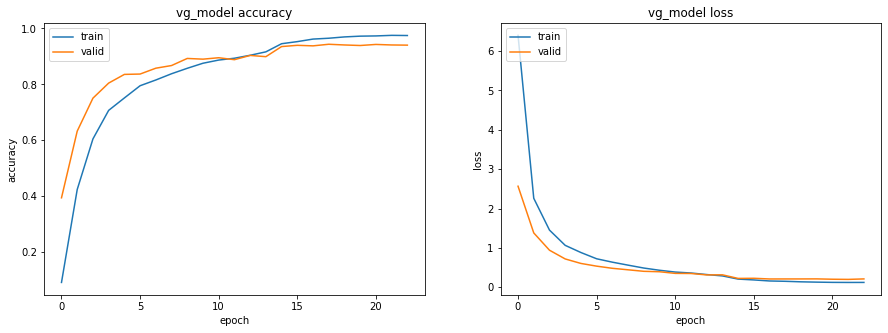

In [50]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(vg_model_hist.history['accuracy'])
ax[0].plot(vg_model_hist.history['val_accuracy'])
ax[0].set_title('vg_model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'valid'], loc='upper left')


ax[1].plot(vg_model_hist.history['loss'])
ax[1].plot(vg_model_hist.history['val_loss'])
ax[1].set_title('vg_model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'valid'], loc='upper left')
plt.show()

In [51]:
_, acc = vg_model.evaluate(test_generator, verbose=1)
print('Valid Accuracy: %.3f' % (acc * 100))

25/25 [==============================] - 12s 472ms/step - loss: 0.1930 - accuracy: 0.9498
Valid Accuracy: 94.984


In [52]:
vg_model.save('vg_model')

INFO:tensorflow:Assets written to: vg_model\assets


In [72]:
vg_model = keras.models.load_model('C:/Users/izine/Desktop/GitHub/Springboard-Data-Science/Capstone 3/Notebooks/vg_model')

In [73]:
for l in vg_model.layers:
    print(l.name, l.trainable)

block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten False
fc1 False
fc2 False
dense_1 True


In [74]:
vg_model.trainable = True

set_trainable = False
for layer in vg_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        


In [75]:
for l in vg_model.layers:
    print(l.name, l.trainable)

block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
flatten True
fc1 True
fc2 True
dense_1 True


In [77]:
vg_model.compile(Adam(1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

vg_model_hist = vg_model.fit(train_generator,
                            epochs=20,
                            validation_data=valid_generator,
                            callbacks=callback, verbose=1)

Epoch 1/20
719/719 [==============================] - 353s 487ms/step - loss: 0.5211 - accuracy: 0.8499 - val_loss: 0.3741 - val_accuracy: 0.8984 - lr: 1.0000e-05
Epoch 2/20
719/719 [==============================] - 340s 473ms/step - loss: 0.2606 - accuracy: 0.9259 - val_loss: 0.3064 - val_accuracy: 0.9187 - lr: 1.0000e-05
Epoch 3/20
719/719 [==============================] - 338s 469ms/step - loss: 0.2485 - accuracy: 0.9376 - val_loss: 0.2481 - val_accuracy: 0.9422 - lr: 1.0000e-05
Epoch 4/20
719/719 [==============================] - 330s 458ms/step - loss: 0.1130 - accuracy: 0.9729 - val_loss: 0.1347 - val_accuracy: 0.9663 - lr: 1.0000e-05
Epoch 5/20
719/719 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9848
Epoch 00005: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
719/719 [==============================] - 336s 468ms/step - loss: 0.0661 - accuracy: 0.9848 - val_loss: 0.1948 - val_accuracy: 0.9498 - lr: 1.0000e-05
Epoch 6/20
719/719 [

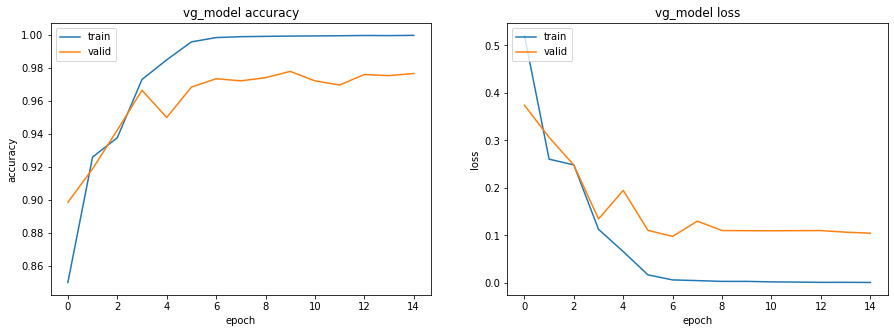

In [79]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(vg_model_hist.history['accuracy'])
ax[0].plot(vg_model_hist.history['val_accuracy'])
ax[0].set_title('vg_model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'valid'], loc='upper left')


ax[1].plot(vg_model_hist.history['loss'])
ax[1].plot(vg_model_hist.history['val_loss'])
ax[1].set_title('vg_model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'valid'], loc='upper left')
plt.show()

In [80]:
_, acc = vg_model.evaluate(test_generator, verbose=1)
print('Valid Accuracy: %.3f' % (acc * 100))

25/25 [==============================] - 12s 456ms/step - loss: 0.0961 - accuracy: 0.9759
Valid Accuracy: 97.587


In [85]:
vg_model.compile(Adam(1e-6),loss='categorical_crossentropy',metrics=['accuracy'])


callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 1, factor=0.5, verbose=1)]

vg_model_hist = vg_model.fit(train_generator,
                            epochs=10,
                            validation_data=valid_generator,
                            callbacks=callback, verbose=1)

Epoch 1/10
719/719 [==============================] - 361s 501ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1093 - val_accuracy: 0.9771 - lr: 1.0000e-06
Epoch 2/10
719/719 [==============================] - 340s 472ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1022 - val_accuracy: 0.9771 - lr: 1.0000e-06
Epoch 3/10
719/719 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999987376214e-07.
719/719 [==============================] - 344s 478ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.1166 - val_accuracy: 0.9752 - lr: 1.0000e-06
Epoch 4/10
719/719 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9993
Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.499999993688107e-07.
719/719 [==============================] - 352s 489ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.1131 - val_accuracy: 0.9771 - lr: 5.0000e-07
Epoch 5/10
719/719

In [86]:
_, acc = vg_model.evaluate(test_generator, verbose=1)
print('Valid Accuracy: %.3f' % (acc * 100))

25/25 [==============================] - 11s 454ms/step - loss: 0.0992 - accuracy: 0.9765
Valid Accuracy: 97.651


In [87]:
vg_model.save('vg_tuned_model')

INFO:tensorflow:Assets written to: vg_tuned_model\assets


In [88]:
vg_tuned_model = keras.models.load_model('C:/Users/izine/Desktop/GitHub/Springboard-Data-Science/Capstone 3/Notebooks/vg_tuned_model')

In [ ]:
#Due to tensorflow workload this hogs up my dedicated GPU memory and even though a model completes execution it continues to hold
# the GPU memory hostage so doing this after sessions allows my GPU to free up.
from numba import cuda

cuda.select_device(0)
cuda.close()